Importamos las librerías necesarias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split, KFold, cross_val_score, RandomizedSearchCV, TimeSeriesSplit, GridSearchCV
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint as sp_randint, uniform
import pickle

Importamos los distintos dataset

In [2]:
dataset_test = "https://raw.githubusercontent.com/carolProg/SNS_23_24/main/ACT_3.6_DENGUE/dengue_features_test.csv"
dataset_train = "https://raw.githubusercontent.com/carolProg/SNS_23_24/main/ACT_3.6_DENGUE/dengue_features_train.csv"
dataset_train_labels = "https://raw.githubusercontent.com/carolProg/SNS_23_24/main/ACT_3.6_DENGUE/dengue_labels_train.csv"
df_train = pd.read_csv(dataset_train)
df_train_labels = pd.read_csv(dataset_train_labels)
df_test = pd.read_csv(dataset_test)

In [3]:
df_train

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,207.10,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0


In [4]:
df_train_labels

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6
...,...,...,...,...
1451,iq,2010,21,5
1452,iq,2010,22,8
1453,iq,2010,23,1
1454,iq,2010,24,1


In [5]:
df_test

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.018900,-0.018900,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.018000,-0.012400,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.001500,NaN,0.151083,0.091529,3.66,299.455714,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.056800,0.039833,0.062267,0.075914,0.76,299.780000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,iq,2013,22,2013-05-28,0.301471,0.380029,0.280629,0.383186,41.12,297.774286,...,67.60,89.990000,41.12,17.185714,10.100000,27.400000,9.050000,32.6,21.8,33.0
412,iq,2013,23,2013-06-04,0.247600,0.296343,0.285371,0.350357,71.52,297.167143,...,45.70,93.891429,71.52,17.448571,9.657143,27.520000,10.720000,33.8,21.4,68.0
413,iq,2013,24,2013-06-11,0.238729,0.251029,0.252586,0.249771,78.96,295.831429,...,45.22,94.967143,78.96,16.410000,7.385714,27.200000,10.075000,32.6,21.6,93.2
414,iq,2013,25,2013-06-18,0.310429,0.302700,0.406614,0.403943,39.54,295.778571,...,4.70,89.057143,39.54,15.137143,8.228571,26.700000,8.480000,32.2,21.8,34.1


Elegimos las columnas comunes de los dataset de dataset_train y dataset_train_labels y fusionamos ambas para tener un dataset único para entrenar.

In [6]:
common_columns = ['city', 'weekofyear', 'year']
df = pd.merge(df_train, df_train_labels, on=common_columns)
df.head(6)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
5,sj,1990,23,1990-06-04,NaN,0.174850,0.254314,0.181743,9.58,299.630000,...,79.891429,9.58,17.212857,2.100000,28.114286,6.942857,34.4,23.9,39.1,2


Estudiamos el dataset y procedemos a su limpieza.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   week_start_date                        1456 non-null   object 
 4   ndvi_ne                                1262 non-null   float64
 5   ndvi_nw                                1404 non-null   float64
 6   ndvi_se                                1434 non-null   float64
 7   ndvi_sw                                1434 non-null   float64
 8   precipitation_amt_mm                   1443 non-null   float64
 9   reanalysis_air_temp_k                  1446 non-null   float64
 10  reanalysis_avg_temp_k                  1446 non-null   float64
 11  rean

Comprobamos se hay valores nulos en el dataset

In [8]:
null_values = df.isnull().sum()
null_values

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

Borramos las columnas de valores nulos

In [9]:
df = df.dropna()

Eliminamos las características poco siginificativas para un problema de regresión

In [10]:
df = df.drop(columns=['week_start_date', 'city', 'year','weekofyear'], axis=1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1199 entries, 0 to 1455
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ndvi_ne                                1199 non-null   float64
 1   ndvi_nw                                1199 non-null   float64
 2   ndvi_se                                1199 non-null   float64
 3   ndvi_sw                                1199 non-null   float64
 4   precipitation_amt_mm                   1199 non-null   float64
 5   reanalysis_air_temp_k                  1199 non-null   float64
 6   reanalysis_avg_temp_k                  1199 non-null   float64
 7   reanalysis_dew_point_temp_k            1199 non-null   float64
 8   reanalysis_max_air_temp_k              1199 non-null   float64
 9   reanalysis_min_air_temp_k              1199 non-null   float64
 10  reanalysis_precip_amt_kg_per_m2        1199 non-null   float64
 11  reanalysi

Reseteamos los índices para que sean secuenciales

In [12]:
df.reset_index(drop=True, inplace=True)

Creamos la gráfica de correlación en la que mediante un mapa de calor veremos la afinidad entre las columnas

<Axes: >

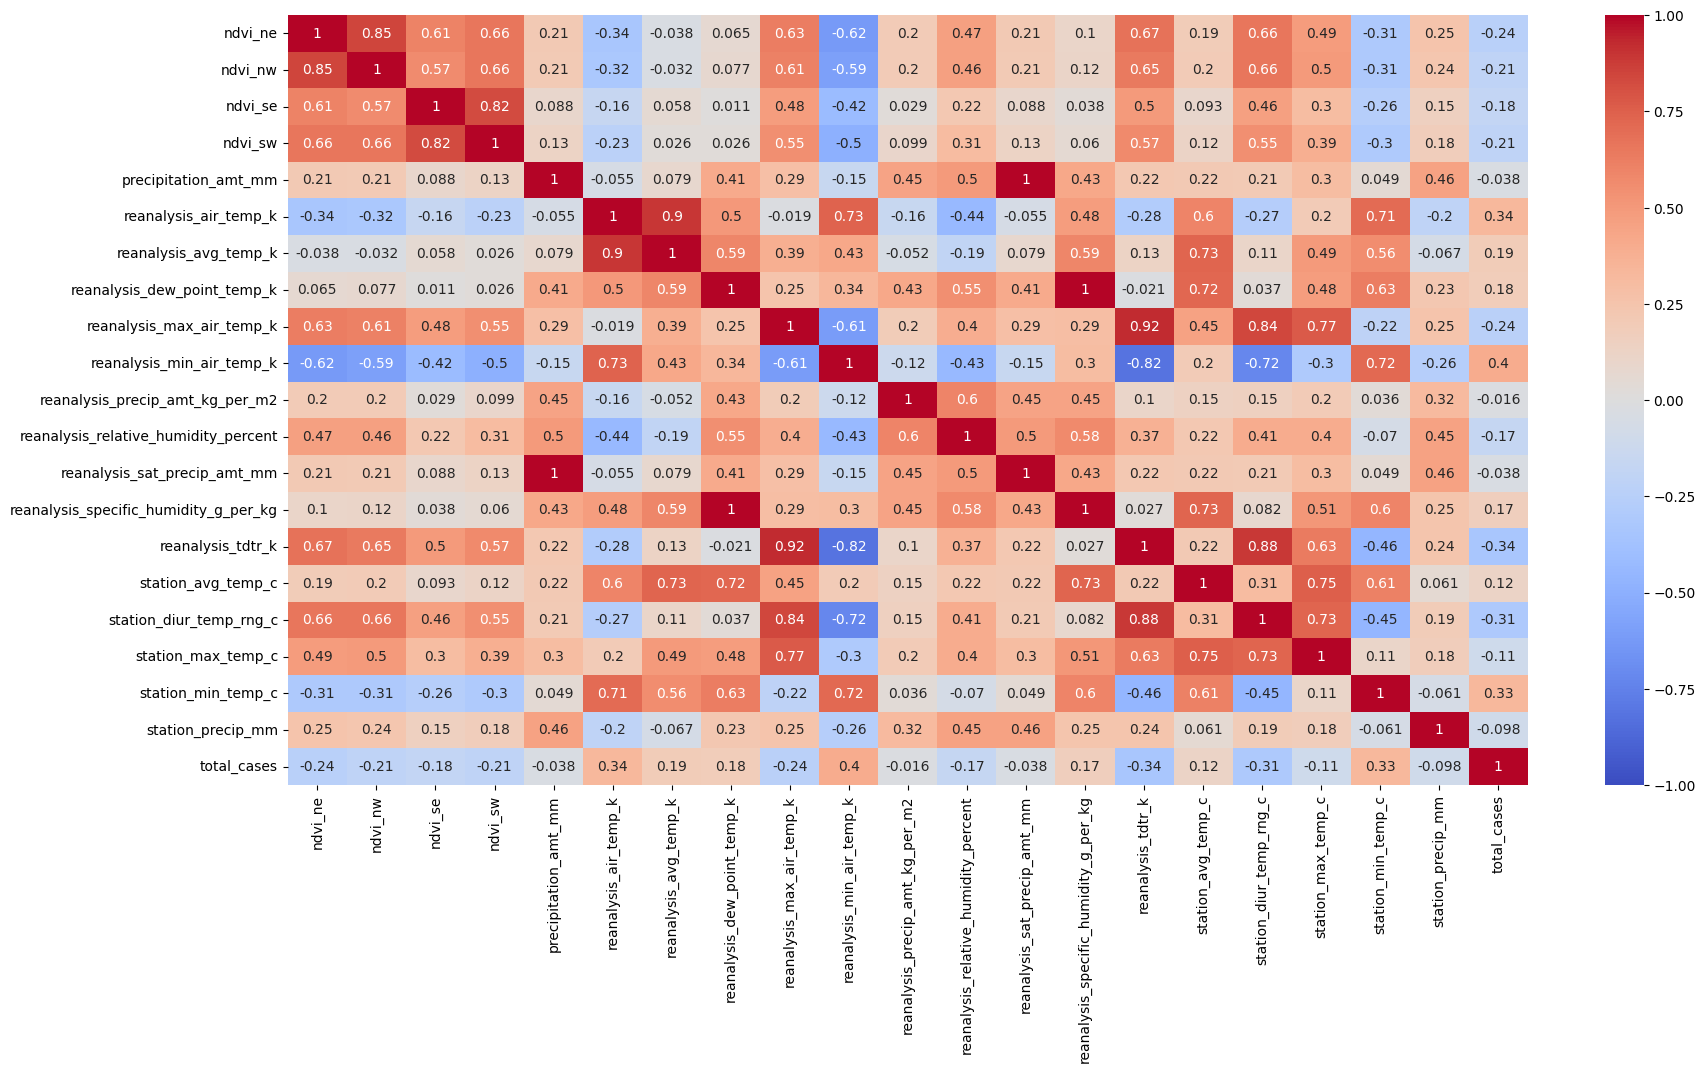

In [13]:
cor = df.corr()
plt.figure(figsize=(20 , 10))
sns.heatmap(cor , vmin = -1 , vmax = 1 , cmap = "coolwarm" , annot= True)

Eliminamos las columnas que no tengan relación significativa entre ellas

In [14]:
df = df.drop(columns=["reanalysis_sat_precip_amt_mm", 'reanalysis_dew_point_temp_k',
                      'reanalysis_max_air_temp_k', 'reanalysis_avg_temp_k',
                      'reanalysis_tdtr_k', 'ndvi_nw', 'station_avg_temp_c', 'ndvi_sw' ])

Ahora tenemos la nueva matriz de correlacion

<Axes: >

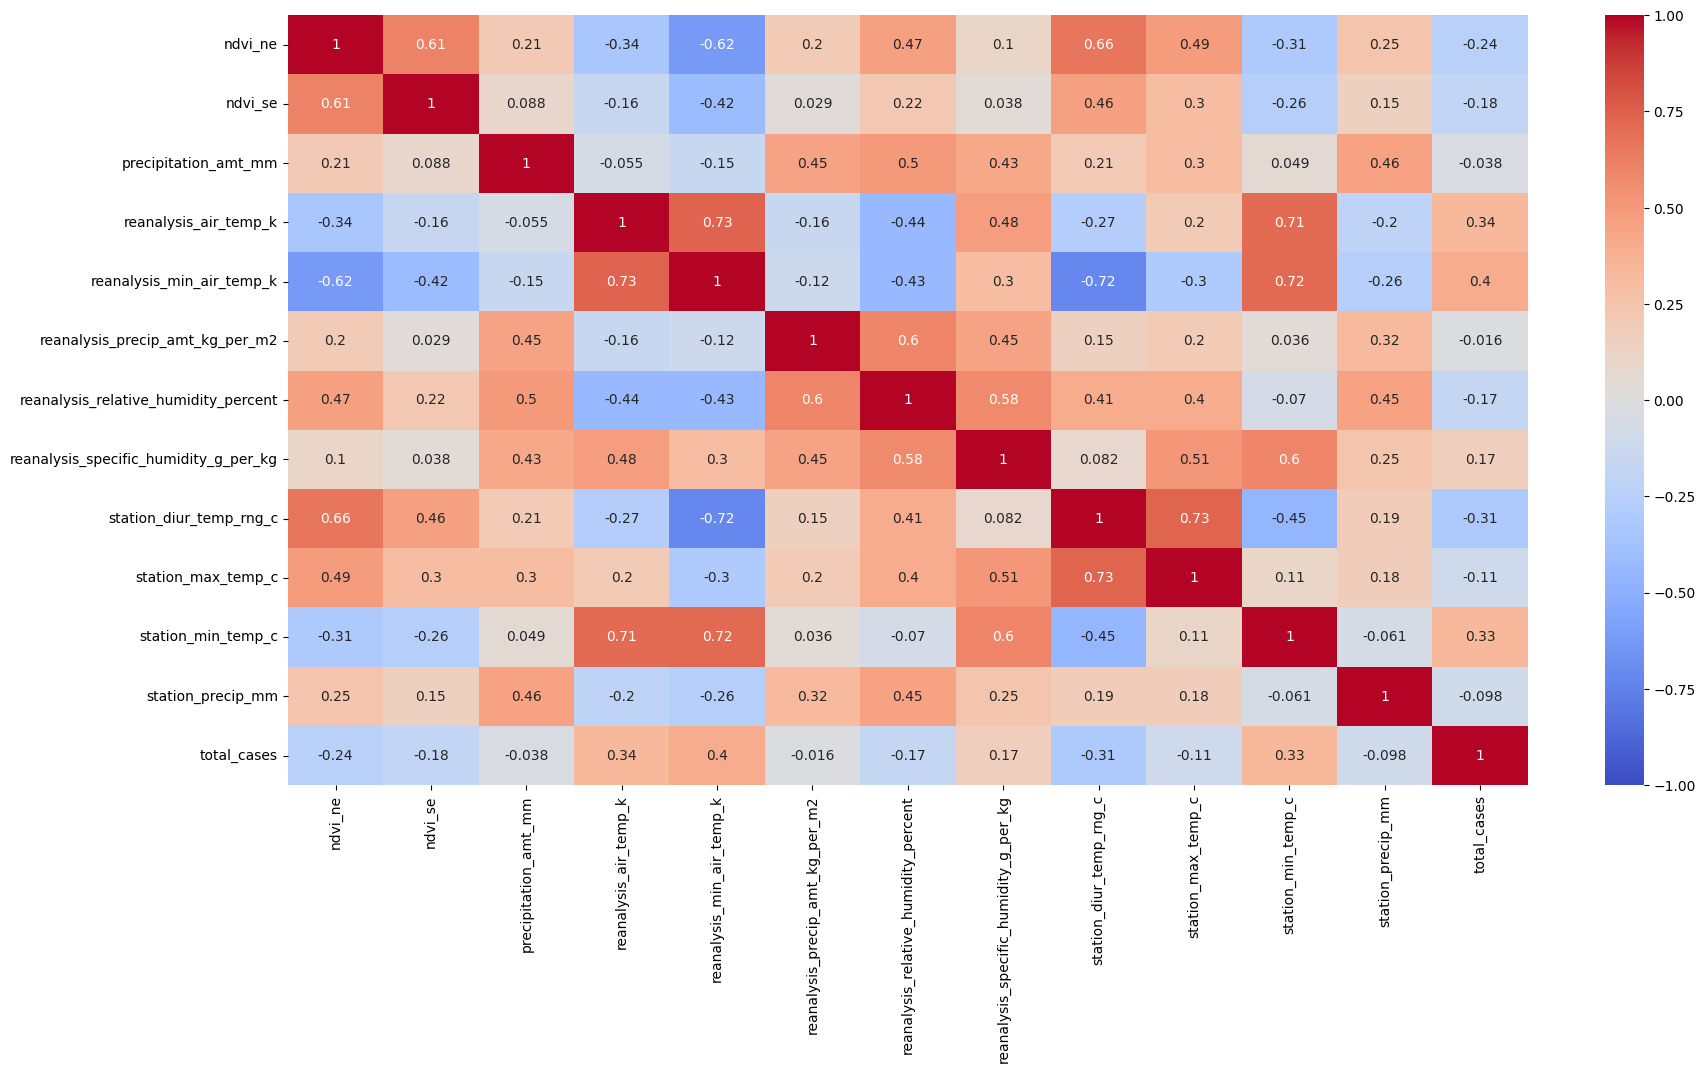

In [15]:
cor = df.corr()
plt.figure(figsize=(20 , 10))
sns.heatmap(cor , vmin = -1 , vmax = 1 , cmap = "coolwarm" , annot= True)

Utilizamos **SelectKBest**

Características seleccionadas con k=1: Index(['reanalysis_min_air_temp_k'], dtype='object')
Características seleccionadas con k=2: Index(['reanalysis_air_temp_k', 'reanalysis_min_air_temp_k'], dtype='object')
Características seleccionadas con k=3: Index(['reanalysis_air_temp_k', 'reanalysis_min_air_temp_k',
       'station_min_temp_c'],
      dtype='object')
Características seleccionadas con k=4: Index(['reanalysis_air_temp_k', 'reanalysis_min_air_temp_k',
       'station_diur_temp_rng_c', 'station_min_temp_c'],
      dtype='object')
Características seleccionadas con k=5: Index(['ndvi_ne', 'reanalysis_air_temp_k', 'reanalysis_min_air_temp_k',
       'station_diur_temp_rng_c', 'station_min_temp_c'],
      dtype='object')
Características seleccionadas con k=6: Index(['ndvi_ne', 'ndvi_se', 'reanalysis_air_temp_k',
       'reanalysis_min_air_temp_k', 'station_diur_temp_rng_c',
       'station_min_temp_c'],
      dtype='object')
Características seleccionadas con k=7: Index(['ndvi_ne', 'ndvi

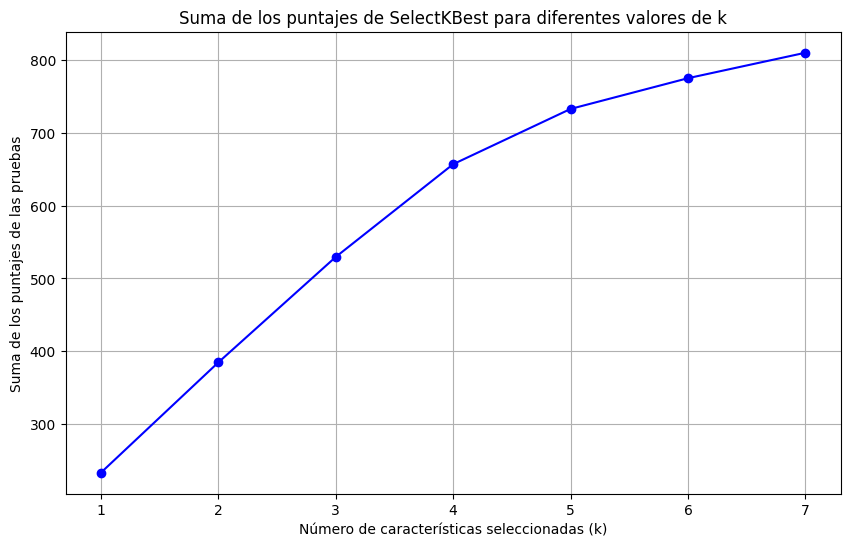

k=1: ['reanalysis_min_air_temp_k']
k=2: ['reanalysis_air_temp_k', 'reanalysis_min_air_temp_k']
k=3: ['reanalysis_air_temp_k', 'reanalysis_min_air_temp_k', 'station_min_temp_c']
k=4: ['reanalysis_air_temp_k', 'reanalysis_min_air_temp_k', 'station_diur_temp_rng_c', 'station_min_temp_c']
k=5: ['ndvi_ne', 'reanalysis_air_temp_k', 'reanalysis_min_air_temp_k', 'station_diur_temp_rng_c', 'station_min_temp_c']
k=6: ['ndvi_ne', 'ndvi_se', 'reanalysis_air_temp_k', 'reanalysis_min_air_temp_k', 'station_diur_temp_rng_c', 'station_min_temp_c']
k=7: ['ndvi_ne', 'ndvi_se', 'reanalysis_air_temp_k', 'reanalysis_min_air_temp_k', 'reanalysis_relative_humidity_percent', 'station_diur_temp_rng_c', 'station_min_temp_c']


In [16]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression
import matplotlib.pyplot as plt

# Asumiendo que 'df' ya contiene tu DataFrame y 'y' ha sido definido como df['total_cases']
y = df['total_cases']
# Eliminar la columna objetivo del DataFrame para preparar los datos
df = df.drop(['total_cases'], axis=1)

# Preparar listas para almacenar sumas de puntajes y nombres de características seleccionadas para cada k
sum_scores = []
features_names = []

for i in range(1, 8):
    # Configurar y aplicar SelectKBest
    selector = SelectKBest(score_func=f_regression, k=i)
    X_new = selector.fit_transform(df, y)  # Ajusta el modelo y transforma los datos

    # Obtener los nombres de las columnas de las características seleccionadas y sus puntajes
    selected_columns = df.columns[selector.get_support()]
    scores = selector.scores_[selector.get_support()]

    # Agregar la suma de los puntajes y los nombres de las características a las listas
    sum_scores.append(scores.sum())
    features_names.append(list(selected_columns))

    # Imprimir los nombres de las columnas seleccionadas
    print(f"Características seleccionadas con k={i}: {selected_columns}")

# Graficar la suma de los puntajes de las pruebas para diferentes valores de k
plt.figure(figsize=(10, 6))
plt.plot(range(1, 8), sum_scores, marker='o', linestyle='-', color='b')
plt.title('Suma de los puntajes de SelectKBest para diferentes valores de k')
plt.xlabel('Número de características seleccionadas (k)')
plt.ylabel('Suma de los puntajes de las pruebas')
plt.xticks(range(1, 8))
plt.grid(True)
plt.show()

# Opcionalmente, imprimir los nombres de las características seleccionadas para cada k
for i, names in enumerate(features_names, 1):
    print(f"k={i}: {names}")


In [17]:
selected_columns = ['ndvi_ne', 'ndvi_se', 'reanalysis_air_temp_k', 'reanalysis_relative_humidity_percent',
       'reanalysis_min_air_temp_k', 'station_diur_temp_rng_c', 'station_min_temp_c']

In [18]:
X = df[selected_columns]

Realizamos un escalado de datos simple

In [19]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled['total_cases'] = y
df= df_scaled

Visualizamos los gráficos de dispersión para detectar outliers

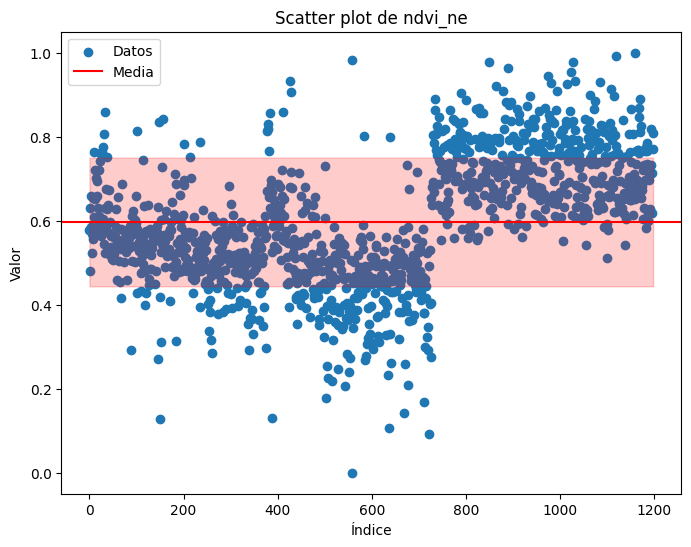

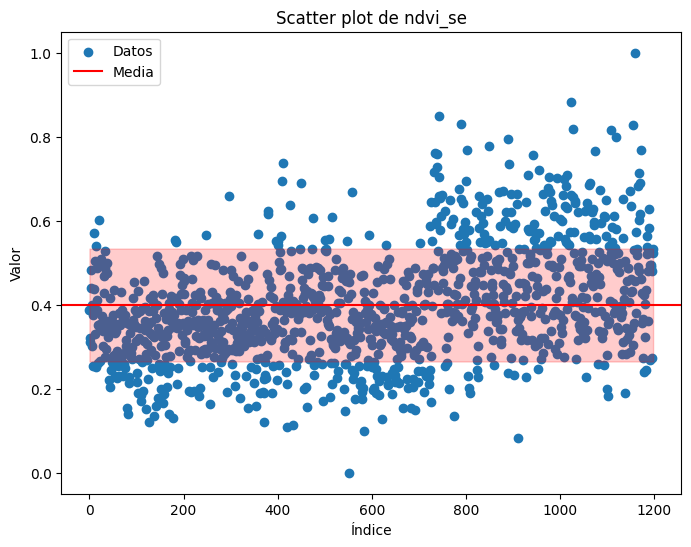

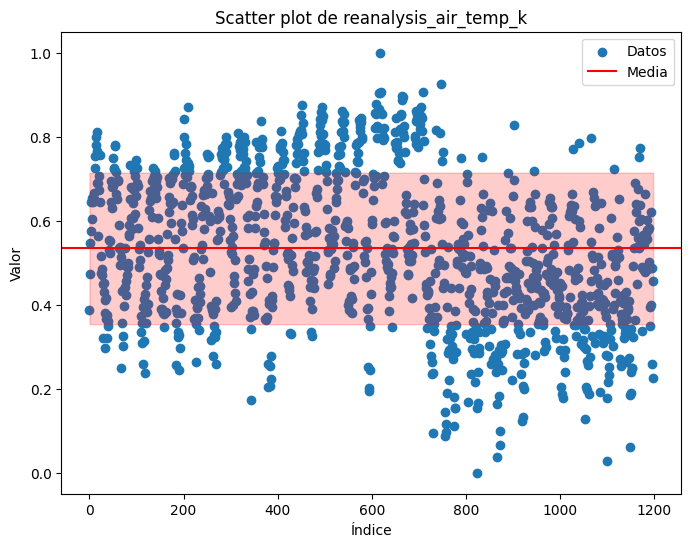

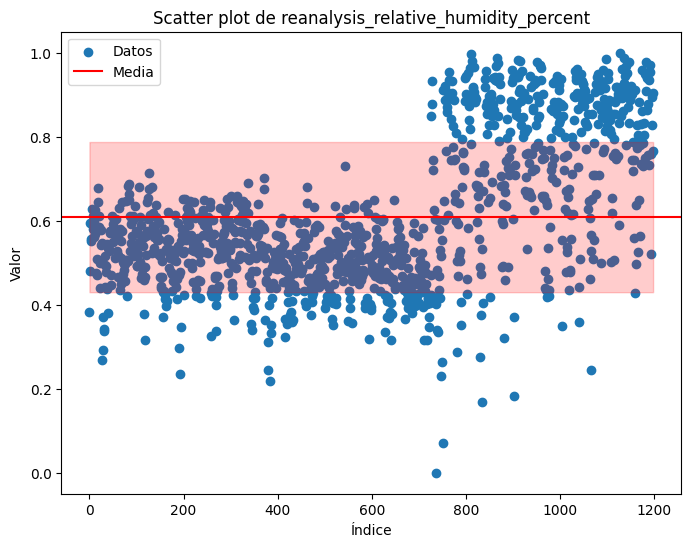

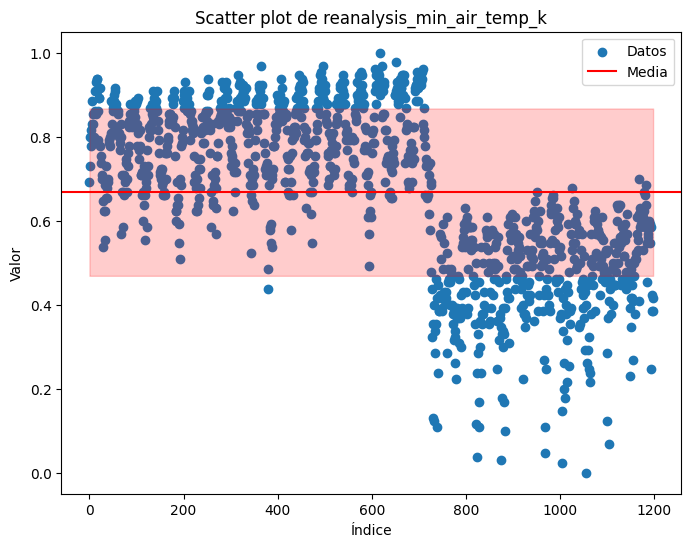

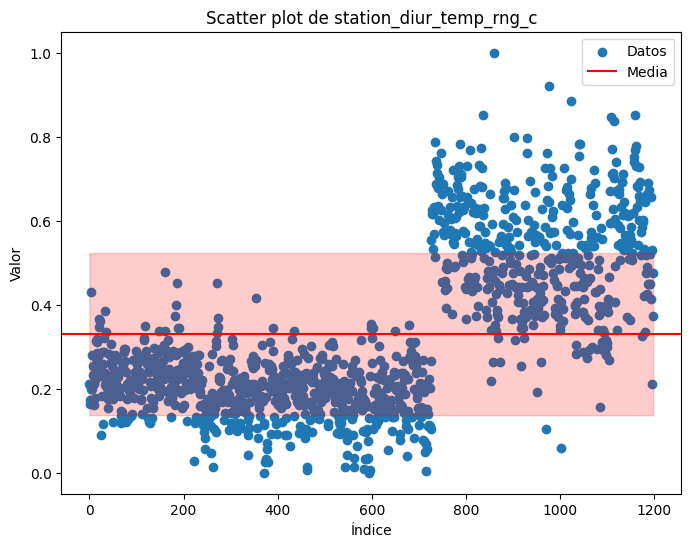

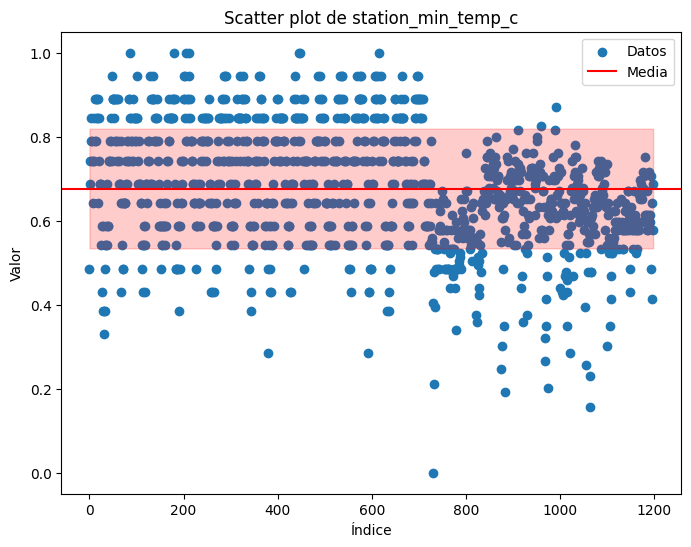

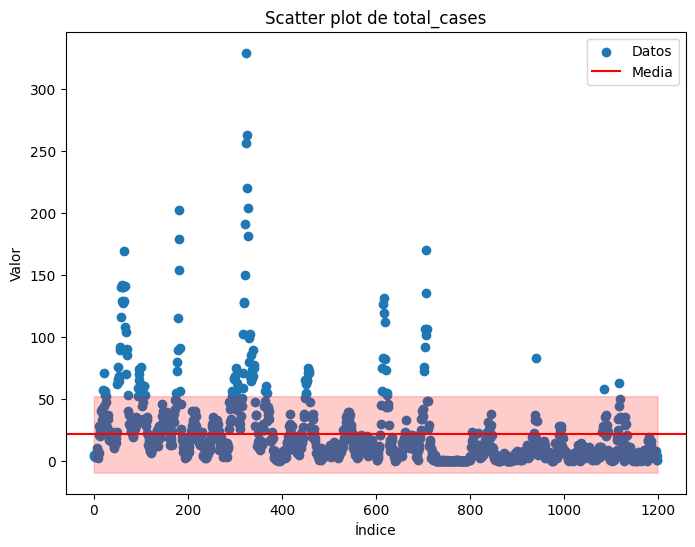

In [21]:
def scatter_plot_outliers(data, columns):
    for col in columns:
        plt.figure(figsize=(8, 6))

        # Datos de la columna actual
        y_values = data[col]

        # Calculando la media y la desviación estándar
        mean = np.mean(y_values)
        std = np.std(y_values)

        # Gráfico de dispersión de los datos
        plt.scatter(range(len(y_values)), y_values, label='Datos')

        # Línea para la media
        plt.axhline(y=mean, color='r', linestyle='-', label='Media')
        # Sombreado para +/- 1 desviación estándar
        plt.fill_between(range(len(y_values)), mean-std, mean+std, color='r', alpha=0.2)

        plt.title(f"Scatter plot de {col}")
        plt.xlabel("Índice")
        plt.ylabel("Valor")
        plt.legend()
        plt.show()

# Asumiendo que df es tu DataFrame y tiene las columnas adecuadas
scatter_plot_outliers(df, df.columns)



Eliminamos los outliers mediante el rango intercuantil (IQR)

In [22]:
def remove_outliers_iqr(data, columns):
    for col in columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

df = remove_outliers_iqr(df, df.columns)


Representamos los datos sin los outliers

In [23]:
df

,ndvi_ne,ndvi_se,reanalysis_air_temp_k,reanalysis_relative_humidity_percent,reanalysis_min_air_temp_k,station_diur_temp_rng_c,station_min_temp_c,total_cases
0,0.578226,0.386418,0.388291,0.381614,0.692308,0.210393,0.486239,4
1,0.629943,0.321190,0.472710,0.479668,0.730769,0.163498,0.688073,5
2,0.479441,0.311879,0.548064,0.594415,0.800000,0.173638,0.743119,4
3,0.584823,0.438912,0.575260,0.552387,0.776923,0.198986,0.788991,3
4,0.658698,0.481601,0.645515,0.555396,0.815385,0.429658,0.844037,6
...,...,...,...,...,...,...,...,...
1194,0.818931,0.490886,0.621152,0.758854,0.584615,0.656950,0.706422,5
1195,0.619290,0.273679,0.488385,0.828282,0.384615,0.529785,0.642202,8
1196,0.714304,0.480079,0.259490,0.893932,0.423077,0.210393,0.412844,1
1197,0.809270,0.531588,0.226062,0.903240,0.384615,0.373046,0.577982,1


In [24]:
X = df[selected_columns]
y= df['total_cases']

Ahora con los valores escalados dividimos los dataset train y test

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

A coninuación, elegimos tres modelos, 2 de árboles y uno de SVR, y utilizamos GridSearch para obtener los mejores hiperparámetros con el menor MAE posible

***RandomForestRegressor***

In [27]:
regressor = RandomForestRegressor()
regressor

RandomForestRegressor()

Mostramos los resultados

In [28]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


In [29]:
param_dist = {"n_estimators": [32, 64, 128], # Number of trees in random forest
              "max_features": ['sqrt','log2'], # Número de características cunadop está realizando la busqueda para la mejor división
              "max_depth": [8,4, 2], # Profundidad máxima del árbol
              "min_samples_split": [2, 4, 6], #  Número mínimo de muestras necesarias antes de dividir el nodo
              "min_samples_leaf": [8, 12, 16], # Número mínimo de muestras que debe haber en un nodo final
              "bootstrap": [False]
            }

In [30]:
# Número de combinaciones de parámetros que se van a ejecutar
num_combinations = 1
for param in param_dist:
    num_combinations *= len(param_dist[param])
print(f'El número total de combinaciones de parámetros en GridSearchCV es {num_combinations}')

El número total de combinaciones de parámetros en GridSearchCV es 162


In [31]:
grid_regres = GridSearchCV(estimator = regressor, scoring='neg_mean_absolute_error', param_grid= param_dist, cv = 5)
grid_regres.fit(X = df.drop(['total_cases'], axis=1),
                           y = df['total_cases'])

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [False], 'max_depth': [8, 4, 2],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [8, 12, 16],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [32, 64, 128]},
             scoring='neg_mean_absolute_error')

In [32]:
scoring_type = grid_regres.scoring
print(f'El tipo de scoring utilizado en GridSearchCV es {scoring_type}')

El tipo de scoring utilizado en GridSearchCV es neg_mean_absolute_error


In [33]:
grid_regres.cv_results_

{'mean_fit_time': array([0.12161226, 0.29701009, 0.27573519, 0.07908101, 0.13489447,
        0.30266075, 0.08758821, 0.15907941, 0.35984063, 0.0706233 ,
        0.15020351, 0.287745  , 0.14670262, 0.23272457, 0.34086504,
        0.06539035, 0.08158069, 0.16211295, 0.03928251, 0.07999086,
        0.15403609, 0.04033794, 0.0770771 , 0.15592923, 0.03960633,
        0.07838488, 0.15473561, 0.04318466, 0.08460088, 0.16693931,
        0.04255247, 0.11142917, 0.20458713, 0.04223056, 0.08403711,
        0.1678133 , 0.04221177, 0.08104   , 0.15964832, 0.04216609,
        0.08091459, 0.15974817, 0.04150734, 0.08195558, 0.16185746,
        0.04096308, 0.07968783, 0.15508809, 0.03970847, 0.07872343,
        0.15572963, 0.04108267, 0.07972989, 0.21446238, 0.04427137,
        0.06569238, 0.129391  , 0.03370738, 0.06466508, 0.12653031,
        0.03418889, 0.06368303, 0.1275434 , 0.03284407, 0.06343522,
        0.12683558, 0.03357487, 0.06593971, 0.12853012, 0.03271213,
        0.06374211, 0.12842331,

In [34]:
report(grid_regres.cv_results_, n_top = 5)

Model with rank: 1
Mean validation score: -9.655 (std: 3.012)
Parameters: {'bootstrap': False, 'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 12, 'min_samples_split': 6, 'n_estimators': 32}

Model with rank: 2
Mean validation score: -9.673 (std: 3.003)
Parameters: {'bootstrap': False, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 12, 'min_samples_split': 6, 'n_estimators': 32}

Model with rank: 3
Mean validation score: -9.676 (std: 3.003)
Parameters: {'bootstrap': False, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 12, 'min_samples_split': 6, 'n_estimators': 64}

Model with rank: 4
Mean validation score: -9.682 (std: 3.059)
Parameters: {'bootstrap': False, 'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 16, 'min_samples_split': 6, 'n_estimators': 32}

Model with rank: 5
Mean validation score: -9.696 (std: 3.042)
Parameters: {'bootstrap': False, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 2, 'n

In [35]:
grid_regres.best_estimator_

RandomForestRegressor(bootstrap=False, max_depth=4, max_features='log2',
                      min_samples_leaf=12, min_samples_split=6,
                      n_estimators=32)

***DecisionTreeRegressor***

In [36]:
decisionTree = DecisionTreeRegressor()
decisionTree

DecisionTreeRegressor()

In [37]:
param_dist_decision = {"max_features": ['sqrt', 'log2'],  # Número máximo de características para considerar en cada división
              "max_depth": [8, 4, 2],  # Profundidad máxima del árbol
              "min_samples_split": [2, 4, 6],  # Número mínimo de muestras necesarias antes de dividir el nodo
              "min_samples_leaf": [1, 2, 4],  # Número mínimo de muestras que debe haber en un nodo final
              "criterion": ["absolute_error", "squared_error"]  # Criterio para medir la calidad de la división
              }


In [38]:
# Combinaciones de parámetros que se van a ejecutar
num_combinations = 1
for param in param_dist_decision:
    num_combinations *= len(param_dist_decision[param])
print(f'El número total de combinaciones de parámetros en GridSearchCV es {num_combinations}')

El número total de combinaciones de parámetros en GridSearchCV es 108


In [39]:
grid_decision = GridSearchCV(estimator = decisionTree, scoring='neg_mean_absolute_error', param_grid= param_dist_decision, cv = 5)
grid_decision.fit(X = df.drop(['total_cases'], axis=1),
                           y = df['total_cases'])

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['absolute_error', 'squared_error'],
                         'max_depth': [8, 4, 2],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 6]},
             scoring='neg_mean_absolute_error')

In [40]:
scoring_type = grid_decision.scoring
print(f'El tipo de scoring utilizado en GridSearchCV es {scoring_type}')

El tipo de scoring utilizado en GridSearchCV es neg_mean_absolute_error


In [41]:
report(grid_decision.cv_results_, n_top = 5)

Model with rank: 1
Mean validation score: -9.497 (std: 3.291)
Parameters: {'criterion': 'absolute_error', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 4}

Model with rank: 2
Mean validation score: -9.526 (std: 3.393)
Parameters: {'criterion': 'absolute_error', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2}

Model with rank: 3
Mean validation score: -9.611 (std: 3.416)
Parameters: {'criterion': 'absolute_error', 'max_depth': 2, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 4}

Model with rank: 4
Mean validation score: -9.618 (std: 3.432)
Parameters: {'criterion': 'absolute_error', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 6}

Model with rank: 5
Mean validation score: -9.666 (std: 2.751)
Parameters: {'criterion': 'squared_error', 'max_depth': 2, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 4}



In [42]:
grid_decision.best_estimator_

DecisionTreeRegressor(criterion='absolute_error', max_depth=2,
                      max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=4)

***SVR***

In [43]:
svr = SVR()
svr

SVR()

In [44]:
param_dist_svr = {"C": [0.1, 1, 10],  # Parámetro de regularización
              "kernel": ['linear', 'poly', 'rbf', 'sigmoid'],  # Tipo de kernel a utilizar
              "gamma": ['scale', 'auto'],  # Coeficiente de kernel para 'rbf', 'poly' y 'sigmoid'
              "epsilon": [0.1, 0.2, 0.3],  # Márgen de error tolerable
              "degree": [2, 3, 4]  # Grado del polinomio en el kernel polinomial
              }


In [45]:
num_combinations = 1
for param in param_dist_svr:
    num_combinations *= len(param_dist_svr[param])
print(f'El número total de combinaciones de parámetros en GridSearchCV es {num_combinations}')

El número total de combinaciones de parámetros en GridSearchCV es 216


In [46]:
grid_svr = GridSearchCV(estimator = svr, scoring='neg_mean_absolute_error', param_grid= param_dist_svr, cv = 5)
grid_svr.fit(X = df.drop(['total_cases'], axis=1),
                           y = df['total_cases'])

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10], 'degree': [2, 3, 4],
                         'epsilon': [0.1, 0.2, 0.3], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='neg_mean_absolute_error')

In [47]:
scoring_type = grid_svr.scoring
print(f'El tipo de scoring utilizado en GridSearchCV es {scoring_type}')

El tipo de scoring utilizado en GridSearchCV es neg_mean_absolute_error


In [48]:
report(grid_svr.cv_results_, n_top = 5)

Model with rank: 1
Mean validation score: -9.363 (std: 3.414)
Parameters: {'C': 1, 'degree': 2, 'epsilon': 0.2, 'gamma': 'auto', 'kernel': 'rbf'}

Model with rank: 1
Mean validation score: -9.363 (std: 3.414)
Parameters: {'C': 1, 'degree': 3, 'epsilon': 0.2, 'gamma': 'auto', 'kernel': 'rbf'}

Model with rank: 1
Mean validation score: -9.363 (std: 3.414)
Parameters: {'C': 1, 'degree': 4, 'epsilon': 0.2, 'gamma': 'auto', 'kernel': 'rbf'}

Model with rank: 4
Mean validation score: -9.368 (std: 3.417)
Parameters: {'C': 1, 'degree': 2, 'epsilon': 0.3, 'gamma': 'auto', 'kernel': 'rbf'}

Model with rank: 4
Mean validation score: -9.368 (std: 3.417)
Parameters: {'C': 1, 'degree': 3, 'epsilon': 0.3, 'gamma': 'auto', 'kernel': 'rbf'}

Model with rank: 4
Mean validation score: -9.368 (std: 3.417)
Parameters: {'C': 1, 'degree': 4, 'epsilon': 0.3, 'gamma': 'auto', 'kernel': 'rbf'}



In [49]:
grid_svr.best_estimator_

SVR(C=1, degree=2, epsilon=0.2, gamma='auto')

A continuación, mostramos los MAE y los MSE de cada modelo

In [50]:
# Definir los nombres de los modelos y los clasificadores correspondientes
names = ["DecisionTree", "RandomForest", "SVR"]
classifiers = [DecisionTreeRegressor(criterion='absolute_error', max_depth=2,max_features='sqrt', min_samples_leaf=2),
               RandomForestRegressor(bootstrap=False, max_depth=4, max_features='log2',min_samples_leaf=12, n_estimators=64),
               SVR(C=1, degree=2, epsilon=0.2, gamma='auto')]

# Lista para almacenar los puntajes de validación cruzada
cv_scores_mae = []
cv_scores_mse = []

# Iterar sobre los modelos y calcular los puntajes de validación cruzada
for name, clf in zip(names, classifiers):
    scores_mae = -1 * cross_val_score(clf, X_train, y_train, cv=4, scoring='neg_mean_absolute_error')
    scores_mse = -1 * cross_val_score(clf, X_train, y_train, cv=4, scoring='neg_mean_squared_error')
    print("Puntuaciones MAE para {}:".format(name))
    print(scores_mae)
    print("Puntuaciones MSE para {}:".format(name))
    print(scores_mse)
    cv_scores_mae.append(scores_mae)
    cv_scores_mse.append(scores_mse)

# Calcular el promedio de los puntajes de validación cruzada para cada modelo
mean_cv_scores_mae = [np.mean(scores) for scores in cv_scores_mae]
mean_cv_scores_mse = [np.mean(scores) for scores in cv_scores_mse]

# Imprimir los resultados
for i in range(len(names)):
    print("Modelo Con Cross Validation (Con Librería): {} - MAE = {:.2f}, MSE = {:.2f}".format(names[i], mean_cv_scores_mae[i], mean_cv_scores_mse[i]))

Puntuaciones MAE para DecisionTree:
[9.16176471 9.32248521 8.02662722 7.87573964]
Puntuaciones MSE para DecisionTree:
[147.48823529 187.76331361 126.9704142  114.23076923]
Puntuaciones MAE para RandomForest:
[8.86308826 9.57791063 8.31379871 7.43213867]
Puntuaciones MSE para RandomForest:
[122.0276857  162.65201137 120.63131469 100.71652578]
Puntuaciones MAE para SVR:
[8.88059781 9.5273991  8.05780161 7.53630097]
Puntuaciones MSE para SVR:
[143.5158759  190.38063108 133.91953381 112.79163989]
Modelo Con Cross Validation (Con Librería): DecisionTree - MAE = 8.60, MSE = 144.11
Modelo Con Cross Validation (Con Librería): RandomForest - MAE = 8.55, MSE = 126.51
Modelo Con Cross Validation (Con Librería): SVR - MAE = 8.50, MSE = 145.15


Ahora hacemos lo mismo con RandomizedSearchCV.

In [51]:
random_test=sp_randint(2, 50)

In [52]:
param_dist = {"n_estimators": [4, 8, 16, 32, 64, 128], # Number of trees in random forest
              "max_features": ['log2', 'sqrt'], # Número de características cunadop está realizando la busqueda para la mejor división
              "max_depth": [16, 12,8,4, 2,None], # Profundidad máxima del árbol
              "min_samples_split": sp_randint(2, 50), #  Número mínimo de muestras necesarias antes de dividir el nodo. Genera valores aletorios entre los valores indicados.
              "min_samples_leaf": sp_randint(1, 50), #  Número mínimo de muestras que debe haber en un nodo final. Genera valores aletorios entre los valores indicados,
              "bootstrap": [True, False]} # Method of selecting samples for training each tree

In [53]:
tscv = TimeSeriesSplit(n_splits=5)
rnd_regres = RandomizedSearchCV(estimator = regressor, param_distributions = param_dist, n_iter = 100, cv = tscv, random_state=0, n_jobs = -1)

# Fit the random search model
rnd_regres.fit(X = df.drop(['total_cases'], axis=1),
                           y = df['total_cases'])

RandomizedSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
                   estimator=RandomForestRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [16, 12, 8, 4, 2, None],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b09be5f60e0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b09be5f42e0>,
                                        'n_estimators': [4, 8, 16, 32, 64,
                                                         128]},
                   random_state=0)

In [54]:
report(rnd_regres.cv_results_, n_top = 5)

Model with rank: 1
Mean validation score: -0.272 (std: 0.273)
Parameters: {'bootstrap': True, 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 20, 'min_samples_split': 35, 'n_estimators': 4}

Model with rank: 2
Mean validation score: -0.302 (std: 0.331)
Parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 46, 'min_samples_split': 13, 'n_estimators': 4}

Model with rank: 3
Mean validation score: -0.306 (std: 0.380)
Parameters: {'bootstrap': True, 'max_depth': 12, 'max_features': 'log2', 'min_samples_leaf': 49, 'min_samples_split': 5, 'n_estimators': 16}

Model with rank: 4
Mean validation score: -0.307 (std: 0.323)
Parameters: {'bootstrap': True, 'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 30, 'min_samples_split': 21, 'n_estimators': 32}

Model with rank: 5
Mean validation score: -0.310 (std: 0.340)
Parameters: {'bootstrap': True, 'max_depth': 12, 'max_features': 'log2', 'min_samples_leaf': 28, 'min_samples_split': 16,

In [55]:
rnd_regres.best_params_

{'bootstrap': True,
 'max_depth': 2,
 'max_features': 'sqrt',
 'min_samples_leaf': 20,
 'min_samples_split': 35,
 'n_estimators': 4}

In [56]:
param_dist_decision = {"max_features": ['sqrt', 'log2'],  # Número máximo de características para considerar en cada división
              "max_depth": [16, 12,8,4, 2,None],  # Profundidad máxima del árbol
              "min_samples_split":sp_randint(2,50),  # Número mínimo de muestras necesarias antes de dividir el nodo
              "min_samples_leaf": sp_randint(1,50),  # Número mínimo de muestras que debe haber en un nodo final
              "criterion": ["absolute_error", "squared_error"]  # Criterio para medir la calidad de la división
              }

In [57]:
tscv = TimeSeriesSplit(n_splits=5)
rnd_decision = RandomizedSearchCV(estimator = decisionTree, param_distributions = param_dist_decision, n_iter = 100, cv = tscv, random_state=0, n_jobs = -1)


# Ajustamos el modelo de búsqueda aleatoria
rnd_decision.fit(X = df.drop(['total_cases'], axis=1),
                           y = df['total_cases'])

RandomizedSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
                   estimator=DecisionTreeRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['absolute_error',
                                                      'squared_error'],
                                        'max_depth': [16, 12, 8, 4, 2, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b09be55d060>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b09be55fa00>},
                   random_state=0)

In [58]:
report(rnd_decision.cv_results_, n_top = 5)

Model with rank: 1
Mean validation score: -0.269 (std: 0.237)
Parameters: {'criterion': 'squared_error', 'max_depth': 12, 'max_features': 'log2', 'min_samples_leaf': 49, 'min_samples_split': 37}

Model with rank: 2
Mean validation score: -0.331 (std: 0.176)
Parameters: {'criterion': 'absolute_error', 'max_depth': 8, 'max_features': 'log2', 'min_samples_leaf': 14, 'min_samples_split': 42}

Model with rank: 3
Mean validation score: -0.344 (std: 0.133)
Parameters: {'criterion': 'squared_error', 'max_depth': 16, 'max_features': 'sqrt', 'min_samples_leaf': 25, 'min_samples_split': 31}

Model with rank: 4
Mean validation score: -0.344 (std: 0.150)
Parameters: {'criterion': 'absolute_error', 'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 19, 'min_samples_split': 48}

Model with rank: 5
Mean validation score: -0.360 (std: 0.225)
Parameters: {'criterion': 'absolute_error', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 35, 'min_samples_split': 44}



In [59]:
rnd_decision.best_params_

{'criterion': 'squared_error',
 'max_depth': 12,
 'max_features': 'log2',
 'min_samples_leaf': 49,
 'min_samples_split': 37}

In [60]:
param_dist_svr = {"C": uniform(0.1, 10 - 0.1),  # Parámetro de regularización
                  "kernel": ['linear', 'poly', 'rbf', 'sigmoid'],  # Tipo de kernel a utilizar
                  "gamma": ['scale', 'auto'],  # Coeficiente de kernel para 'rbf', 'poly' y 'sigmoid'
                  "epsilon": uniform(0.1, 0.3 - 0.1),  # Márgen de error tolerable
                  "degree": sp_randint(2, 5)  # Grado del polinomio en el kernel polinomial
                  }

In [61]:
tscv = TimeSeriesSplit(n_splits=5)
rnd_svr = RandomizedSearchCV(estimator = svr, param_distributions = param_dist_svr, n_iter = 100, cv = tscv, random_state=0, n_jobs = -1)

# Ajustamos el modelo de búsqueda aleatoria
rnd_svr.fit(X = df.drop(['total_cases'], axis=1),
                           y = df['total_cases'])

RandomizedSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
                   estimator=SVR(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7b09be55f3d0>,
                                        'degree': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b09be41ead0>,
                                        'epsilon': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7b09be55ee90>,
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   random_state=0)

In [62]:
report(rnd_svr.cv_results_, n_top = 5)

Model with rank: 1
Mean validation score: -0.167 (std: 0.230)
Parameters: {'C': 0.2860190243199159, 'degree': 3, 'epsilon': 0.12993497343673663, 'gamma': 'scale', 'kernel': 'linear'}

Model with rank: 2
Mean validation score: -0.167 (std: 0.235)
Parameters: {'C': 2.0239880071355336, 'degree': 3, 'epsilon': 0.16944670358644393, 'gamma': 'auto', 'kernel': 'sigmoid'}

Model with rank: 3
Mean validation score: -0.167 (std: 0.234)
Parameters: {'C': 0.29001266326240194, 'degree': 3, 'epsilon': 0.24321490624572864, 'gamma': 'auto', 'kernel': 'linear'}

Model with rank: 4
Mean validation score: -0.167 (std: 0.219)
Parameters: {'C': 3.4402219881309573, 'degree': 2, 'epsilon': 0.10404367948806514, 'gamma': 'auto', 'kernel': 'poly'}

Model with rank: 5
Mean validation score: -0.169 (std: 0.234)
Parameters: {'C': 2.382276932712666, 'degree': 2, 'epsilon': 0.18477100971163593, 'gamma': 'auto', 'kernel': 'sigmoid'}



In [63]:
rnd_svr.best_params_

{'C': 0.2860190243199159,
 'degree': 3,
 'epsilon': 0.12993497343673663,
 'gamma': 'scale',
 'kernel': 'linear'}

In [64]:
# Definimos los nombres de los modelos y los clasificadores correspondientes
names = ["DecisionTree", "RandomForest", "SVR"]
classifiers = [DecisionTreeRegressor(criterion='absolute_error',max_depth=2,max_features= 'sqrt',min_samples_leaf= 19,min_samples_split=6),
               RandomForestRegressor(bootstrap= True,max_depth= 4,max_features= 'log2',min_samples_leaf=48,min_samples_split=31,n_estimators=8),
               SVR(C=0.2860190243199159,degree= 3,epsilon=0.12993497343673663,gamma='scale',kernel= 'linear' )]

# Lista para almacenar los puntajes de validación cruzada
cv_scores_mae = []
cv_scores_mse = []

# Iteramos sobre los modelos y calcular los puntajes de validación cruzada
for name, clf in zip(names, classifiers):
    scores_mae = -1 * cross_val_score(clf, X_train, y_train, cv=4, scoring='neg_mean_absolute_error')
    scores_mse = -1 * cross_val_score(clf, X_train, y_train, cv=4, scoring='neg_mean_squared_error')
    print("Puntuaciones MAE para {}:".format(name))
    print(scores_mae)
    print("Puntuaciones MSE para {}:".format(name))
    print(scores_mse)
    cv_scores_mae.append(scores_mae)
    cv_scores_mse.append(scores_mse)

# Calculamos el promedio de los puntajes de validación cruzada para cada modelo
mean_cv_scores_mae = [np.mean(scores) for scores in cv_scores_mae]
mean_cv_scores_mse = [np.mean(scores) for scores in cv_scores_mse]

# Imprimimos los resultados
for i in range(len(names)):
    print("Modelo Con Cross Validation (Con Librería): {} - MAE = {:.2f}, MSE = {:.2f}".format(names[i], mean_cv_scores_mae[i], mean_cv_scores_mse[i]))

Puntuaciones MAE para DecisionTree:
[9.37058824 9.22485207 7.90236686 7.83431953]
Puntuaciones MSE para DecisionTree:
[139.07647059 171.34911243 138.53254438 121.79289941]
Puntuaciones MAE para RandomForest:
[9.24686251 9.63496483 8.23293967 7.77046878]
Puntuaciones MSE para RandomForest:
[127.95481688 162.03768412 117.99385842 104.1500133 ]
Puntuaciones MAE para SVR:
[8.84731162 9.5024517  8.03713755 7.50694331]
Puntuaciones MSE para SVR:
[143.02745304 189.47489068 133.25757643 111.8447593 ]
Modelo Con Cross Validation (Con Librería): DecisionTree - MAE = 8.58, MSE = 142.69
Modelo Con Cross Validation (Con Librería): RandomForest - MAE = 8.72, MSE = 128.03
Modelo Con Cross Validation (Con Librería): SVR - MAE = 8.47, MSE = 144.40


El mejor resultado obtenido es el SVR con RandomizedSearchCV con un MAE de 8.47

In [65]:
# Elegimos el mejor
clf = SVR(C=0.2860190243199159,degree= 3,epsilon=0.12993497343673663,gamma='scale',kernel= 'linear')

# Ajustamos y predicción
clf.fit( X_train, y_train)
y_pred = clf.predict(X_val)


from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_val, y_pred)
print ('MAE', mae)


MAE 9.852920941557503


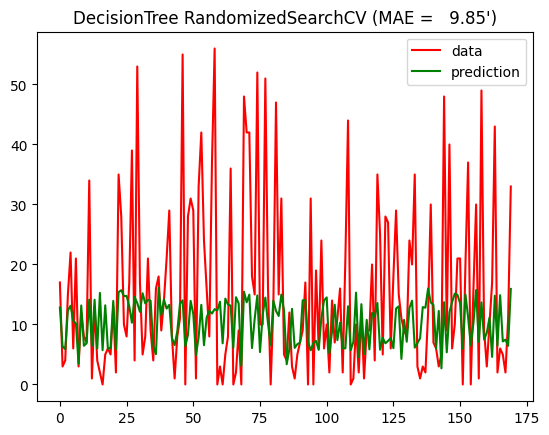

In [66]:
xx = np.arange(y_val.shape[0])
plt.plot(xx, y_val, c='r', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("DecisionTree RandomizedSearchCV (MAE = %6.2f')" % ( mae))

plt.show()

Ahora importamos y exportamos el modelo

In [67]:
dengue_filename = "dengue_model.pkl"
with open(dengue_filename, 'wb') as file:
    pickle.dump(clf, file)

In [68]:
dengue_filename_loaded = "dengue_model.pkl"
with open(dengue_filename_loaded, 'rb') as file:
    model = pickle.load(file)

Comprobamos que no ha habido ningún error en la exportación

MAE 9.852920941557503


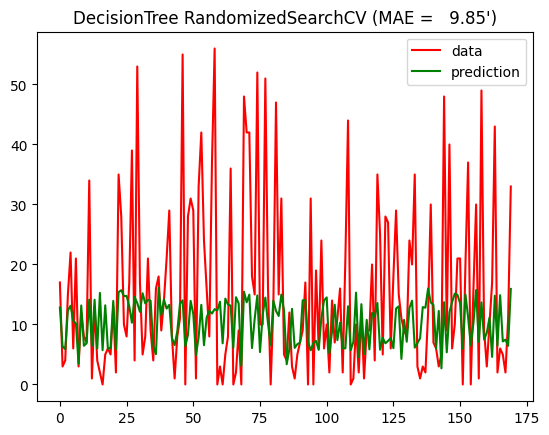

In [69]:
predicted_class = model.predict(X_val[['ndvi_ne', 'ndvi_se', 'reanalysis_air_temp_k', 'reanalysis_relative_humidity_percent',
       'reanalysis_min_air_temp_k', 'station_diur_temp_rng_c', 'station_min_temp_c']])

mae = mean_absolute_error(y_val, predicted_class)
print ('MAE', mae)

xx = np.arange(y_val.shape[0])
plt.plot(xx, y_val, c='r', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("DecisionTree RandomizedSearchCV (MAE = %6.2f')" % ( mae))

plt.show()

A continuación, con el submission_format.csv, insertamos los total_cases que el modelo va a predecir

In [70]:
submission_format = pd.read_csv('https://raw.githubusercontent.com/carolProg/SNS_23_24/main/ACT_3.6_DENGUE/submission_format.csv')

In [73]:
# Reemplazamos los valores NaN por un valor específico, como la media. Scikit-learn ofrece la clase SimpleImputer para esto.
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # 'mean' es el valor predeterminado
df_test[selected_columns] = imputer.fit_transform(df_test[selected_columns])

In [74]:
X = df_test[selected_columns]

Volvemos a escalar el dataset de test para que los valores predichos del modelo no sean muy grandes

In [75]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [76]:
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_test = df_scaled

In [77]:
df_test

,ndvi_ne,ndvi_se,reanalysis_air_temp_k,reanalysis_relative_humidity_percent,reanalysis_min_air_temp_k,station_diur_temp_rng_c,station_min_temp_c
0,0.461195,0.216024,0.533578,0.419245,0.755556,0.282180,0.600
1,0.462129,0.169730,0.531256,0.402567,0.777778,0.141759,0.640
2,0.479249,0.324238,0.664022,0.403776,0.755556,0.350384,0.688
3,0.611589,0.264363,0.695762,0.244858,0.792593,0.208626,0.816
4,0.539739,0.125473,0.707954,0.277178,0.822222,0.284855,0.728
...,...,...,...,...,...,...,...
411,0.793600,0.614150,0.436230,0.758253,0.481481,0.468740,0.608
412,0.737705,0.624764,0.353977,0.876253,0.400000,0.625075,0.576
413,0.728500,0.551392,0.173021,0.908788,0.333333,0.564694,0.592
414,0.802893,0.896096,0.165860,0.730038,0.466667,0.415379,0.608


Valores predichos:

In [78]:
model.predict(df_test[selected_columns])

array([12.69875217, 13.93068639, 12.57947047, 14.27886127, 14.44659835,
       15.58118958, 14.85960889, 14.07442372, 15.60725628, 16.06034323,
       15.07778962, 15.66786593, 13.95231703, 16.33768454, 14.97890149,
       16.08704973, 14.25445143, 15.1164025 , 14.97666125, 13.82086137,
       14.42742777, 13.66150009, 13.34868117, 15.1510649 , 13.97718244,
       13.43301099, 15.91622531, 15.33903046, 14.03129256, 13.84974088,
       14.38647331, 14.06557676, 12.85602963, 12.53443485, 11.71657621,
        9.73262583, 10.51523501, 13.03924936, 12.62651336, 11.6923231 ,
       12.52432308, 11.17587308, 12.45144649,  9.3515465 , 11.91261711,
       12.55656475, 11.68330861, 11.46575323, 11.43565619, 12.46593531,
       12.55137803, 12.64734558, 13.00325719, 13.39903434, 13.97033024,
       13.37612715, 12.9206458 , 14.22628126, 14.23640947, 14.9624018 ,
       14.48845083, 14.73269604, 15.17686087, 15.66521241, 15.28262649,
       15.46530369, 15.91526707, 15.63895892, 15.36913048, 15.11

Insertamos los datos en cada fila.

In [79]:
submission_format['total_cases'] = model.predict(df_test[selected_columns])
submission_format['total_cases'] = submission_format['total_cases'].astype(int)

submission_format

,city,year,weekofyear,total_cases
0,sj,2008,18,12
1,sj,2008,19,13
2,sj,2008,20,12
3,sj,2008,21,14
4,sj,2008,22,14
...,...,...,...,...
411,iq,2013,22,6
412,iq,2013,23,4
413,iq,2013,24,3
414,iq,2013,25,4


In [80]:
submission_format.to_csv('SubmitPredictionsDengue.csv', index=False)

In [81]:
from google.colab import files
files.download('SubmitPredictionsDengue.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>